# Daten
## Unit 2
### CSV

<div style="width:100%;height:30px;background-color:#E31134"></div>

### Einführung
CSV steht für “comma-seperated values” und ist ein Dateiformat zur Speicherung von tabellenartigen Daten. Es ist nicht formal standardisiert worden und daher gibt es bei der Umsetzung in der Praxis sehr viele Varianten.

Die grundlegenden Eigenschaften sind

- CSV-Dateien sind Textdateien mit einer durchgehend einheitlichen Zeichenkodierung 
    - die konkrete Kodierung ist dabei frei wählbar
- Ein Eintrag (engl. *record*) pro Zeile, das Zeilenende wird durch ein Steuerzeichen des Encodings gekennzeichnet
- Die Einträge sind in Felder (engl. *field*)  aufgeteilt, die durch ein Trennzeichen abgegrenzt werden
    - das Trennzeichen ist nicht festgelegt. Üblich sind Komma, Semikolon, Gatter oder das `|` (pipe) Zeichen
- Die Abfolge (und Bedeutung) der Felder ist für jeden Eintrag gleich
    - Ist ein Feld unbelegt, bleibt es leer
    
Problematisch sind dabei Feldinhalte, die das Trennzeichen selbst enthalten. Dazu später mehr.

In der Praxis finden sich sehr viele CSV-Dateien
- Im-/Exportformat für Tabellenkalkulationssoftware
- Exportformat für einfach strukturierte Daten aller Art
    - Bereitstellung von Listen für die Nachnutzung in eigenen Anwendungen
    - Offenes Exportformat für Open Data
    
Es gab auch Standardisierungsversuche, die aber nicht abgeschlossen wurden. 

- IETF: https://tools.ietf.org/html/rfc4180 
- W3C: https://github.com/w3c/csvw 

### Beispieltabellen

Name | Nachname | Superheld
--- | --- | ---
Bruce | Wayne | Batman
Peter | Parker | Spiderman
Clark | Kent | Superman

Vorname | Nachname | Spitzname | Größe | Geburtsort | Team
--- | --- | --- | --- | --- | --- 
Dirk | Nowitzki | “German Wunderkind” | 213 cm |  Würzburg, Deutschland |  Dallas Mavericks

Diese Tabellen sehen als CSV-Daten wie folgt aus:

```
Name,Nachname,Superheld
Bruce,Wayne,Batman
Peter,Parker,Spiderman
Clark,Kent,Superman
```

```
Vorname,Nachname,Spitzname,Größe,Geburtsort,Team
Dirk,Nowitzki,"German Wunderkind",213cm,Würzburg\,Germany,Dallas Mavericks
```

**Aber vorsicht: Es ist in CSV nicht erforderlich, dass die Tabellen einen Tabellenkopf mit den Spaltenbezeichnungen enthalten. Eine Beispieldatei kann auch so aussehen:**



```
0,AAL,2012-12-31,3068000000.0,-222000000.0,-1961000000.0,23.0,-1888000000.0,4695000000.0,53.0
1,AAL,2013-12-31,4975000000.0,-93000000.0,-2723000000.0,67.0,-3114000000.0,10592000000.0,75.0
2,AAL,2014-12-31,4668000000.0,-160000000.0,-150000000.0,143.0,-5311000000.0,15135000000.0,60.0
3,AAL,2015-12-31,5102000000.0,352000000.0,-708000000.0,135.0,-6151000000.0,11591000000.0,51.0
4,AAP,2012-12-29,2409453000.0,-89482000.0,600000.0,32.0,-271182000.0,520215000.0,23.0
5,AAP,2013-12-28,2609239000.0,-32428000.0,2698000.0,26.0,-195757000.0,531293000.0,40.0
6,AAP,2015-01-03,3616038000.0,-48209000.0,3092000.0,25.0,-228446000.0,562945000.0,3.0
7,AAP,2016-01-02,3757085000.0,-21476000.0,-7484000.0,19.0,-234747000.0,603332000.0,2.0
8,AAPL,2013-09-28,36223000000.0,-1949000000.0,1156000000.0,30.0,-8165000000.0,0.0,93.0
9,AAPL,2014-09-27,48649000000.0,-6452000000.0,980000000.0,35.0,-9571000000.0,0.0,40.0
10,AAPL,2015-09-26,60671000000.0,-3124000000.0,1285000000.0,45.0,-11247000000.0,0.0,52.0
11,AAPL,2016-09-24,59321000000.0,1044000000.0,1348000000.0,36.0,-12734000000.0,0.0,85.0
```

Hier müssen Sie wissen, welche Spalte welche Bedeutung hat.

## Varianten

Um Kommas, Anführungszeichen und anderen Sonderzeichen auch in CSV verarbeiten zu können, gibt es Varianten des Formats. Neben unterschiedlichen Trennzeichen (s.o.) können Sonderzeichen auch durch das Vorstellen eines `\` (backslash) als "normale" Zeichen gekennzeichnet werden, die nicht als Trennzeichen interpretiert werden. Weiterhin kann der Zelleninhalt auch in einfache Hochkommas (`'`) oder Anführungszeichen (`"`) gesetzt werden. 

In Programmen, die CSV-Daten schreiben oder lesen, können diese Parameter in der Regel eingestellt werden. Hier ein Beispiel aus LibreOffice, wenn eine CSV-Datei geladen wird:

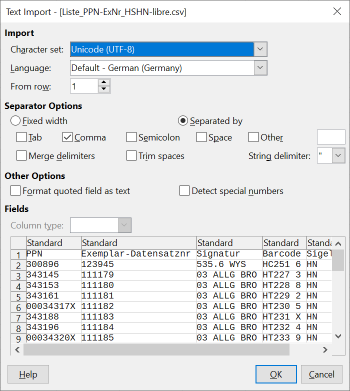

Schauen Sie sich daher CSV-Dateien, die Sie heruntergeladen haben, lieber erst einmal in einem geeigneten Editor an.

<div style="width:100%;height:30px;background-color:#E31134"></div>

# CSV-Modul

Für die gebräuchlichsten Dateiformate gibt es Python-Module, die die Arbeit mit diesen vereinfachen und vereinheitlichen. Für die Arbeit mit CSV-Dateien wird beispielsweise das Modul `csv` als Standardmodul direkt mit Python ausgeliefert, und kann direkt genutzt werden. Sehen Sie sich folgenden Beispiel-Code an und lesen Sie die Kommentare:

```python
import csv  # Das Modul wird importiert

with open('meine_datei.csv', 'wt') as f:    # Die Datei wird im Modus write-text geöffnet
    # Die Datei wird zum Schreiben der Methode writer des Moduls csv übergeben:
    writer = csv.writer(f, delimiter =',',quotechar ='"', quoting=csv.QUOTE_MINIMAL)
    # Die erste Zeile wird geschrieben:
    writer.writerow(['Spalte 1', 'Spalte 2', 'Spalte 3'])
    for i in range(3):       # Wir generieren drei weitere Zeilen...
        row = [
            i + 1,
            (i + 1) * 10,
            'Bla' * (i + 1)
        ]
        writer.writerow(row)  # … und schreiben sie in die csv Datei

print(open('meine_datei.csv', 'rt').read())  # Wir öffnen die Datei und zeigen den Inhalt an.
```

Beim Lesen bzw. Schreiben von CSV-Dateien mit dem Modul csv können zahlreiche Parameter eingestellt werden, um die verschiedenen Variationen des CSV-Formates abzudecken. In Zeile fünf ist beispielsweise zu sehen, wie ein Teil des Formats festgelegt wird: delimiter bestimmt das zu verwendende Trennzeichen, quotechar das Zeichen zur Feldbegrenzung. Mit quoting kann ein Modus zur Verwendung der Feldbegrenzungszeichen eingestellt werden. 

**Weiterführende Informationen:**

- Offizielle Dokumentation des csv Moduls: https://docs.python.org/3/library/csv.html
- Ein recht guter Einstieg mit Beispielprogrammen: https://pymotw.com/3/csv/ 
- Auch gelungen: https://www.programiz.com/python-programming/reading-csv-files
- Oder hier: https://realpython.com/python-csv/

## WICHTIG: Sie müssen an dieser Stelle den weiterführenden Informationen folgen, und sich die Verarbeitung von CSV genau ansehen. 

<div style="width:100%;height:30px;background-color:#E31134"></div>